In [2]:
# Do some imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matlab.engine
eng = matlab.engine.start_matlab()

In [3]:
# Calculate IMFs, residue, and medel(?) using matlab wrapper
def IEMD(img, epsilon=0.1, numberimfs=4, conn='8m'):
    matlab_arr = matlab.double(img.tolist())
    matlab_imfs, matlab_residue, matlab_medel = eng.IEMD_public(matlab_arr, epsilon, numberimfs, conn, nargout=3) 
    
    imfs = np.asarray(matlab_imfs)
    residue = np.asarray(matlab_residue)
    medel = np.asarray(matlab_medel)
    return imfs, residue, medel

In [86]:
def plot_IEMD(imfs, residues):
    plt.figure(2, figsize=(12, 20))
    plt.clf()
    plt.tight_layout(h_pad=3)
    plt.subplots_adjust(hspace=0.1)

    for i in range(np.shape(imfs)[2]):
        plt.subplot(np.shape(imfs)[2],2,1+2*i)
        plt.imshow(imfs[:,:,i],cmap='Greys')
        plt.title("IMF " + str(i + 1))
        plt.colorbar()
        plt.subplot(np.shape(imfs)[2],2,2*i+2)
        plt.imshow(residues[:,:,i],cmap='Greys')
        plt.title("Residue " + str(i + 1))
        plt.colorbar()
    plt.savefig('IEMD.eps')
    plt.show()

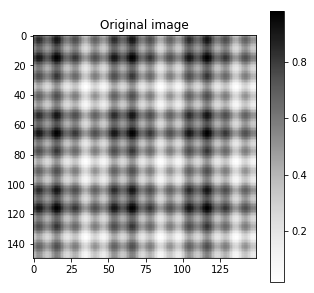

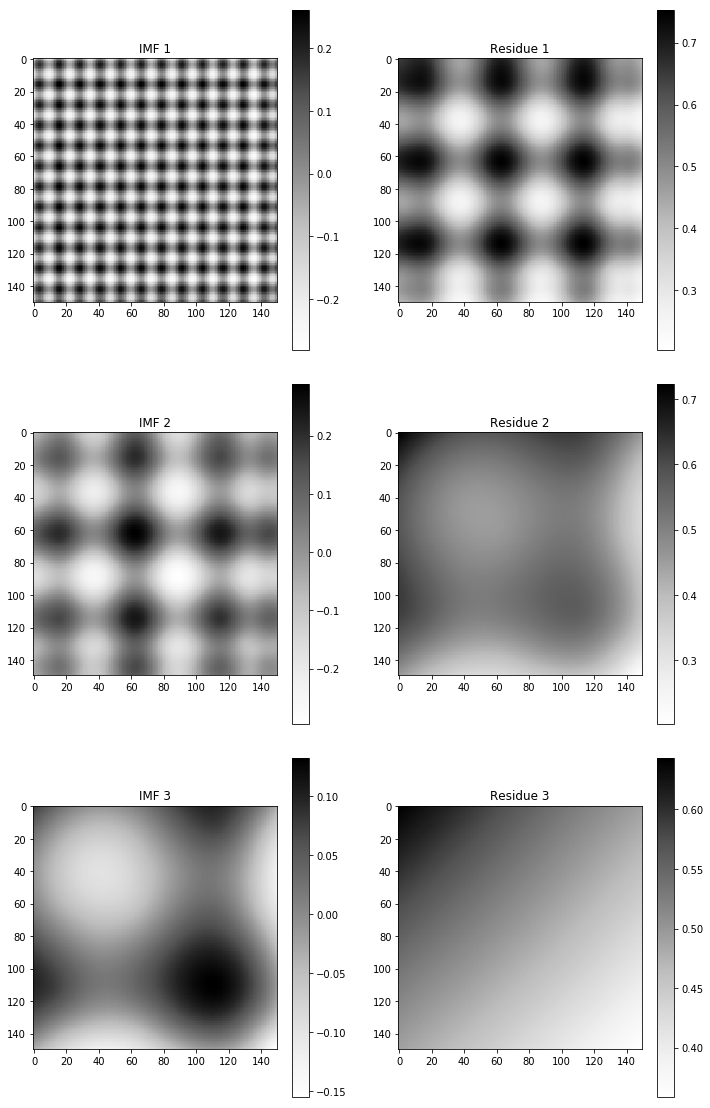

In [103]:
x = np.arange(0, 150)
y = np.arange(0, 150)
xx, yy = np.meshgrid(x, y)
img = 0.5 + np.sin(xx)/8+np.sin(xx/4)/8+np.sin(yy)/8+np.sin(yy/4)/8
plt.figure(1,figsize = (5,5)) 
plt.clf()

plt.imshow(img,cmap='Greys')
plt.title('Original image')
plt.colorbar()
plt.savefig('OrigImg.eps')
plt.show()

imfs, residues, medel = IEMD(img,0.1,3)
plot_IEMD(imfs, residues)


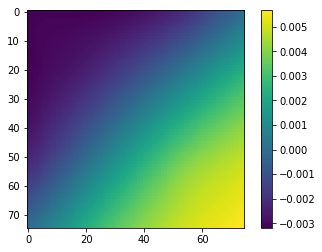

In [95]:
plt.imshow(medel)
plt.colorbar()
plt.show()
